# PSE Data

In [1]:
import pandas as pd

In [2]:
company_data = pd.read_csv("data/pse_company.csv",sep=";") 
company_data.head()

,company_id,free_float_level,last_trade_date,last_trade_price,market_capitilization,outstanding_shares,percent_weight,securityid,security_name,security_symbol,total_market_capitalization
0,29,12.00,2020-04-08,5.87,1.445280e+10,2.462146e+09,0.15,146,"2GO GROUP, INC.",2GO,9.841681e+12
1,55,10.00,2015-05-15,1.61,1.288000e+09,8.000000e+08,0.01,347,ASIA AMALGAMATED HOLDINGS,AAA,9.841681e+12
2,19,10.00,2020-04-08,10.86,2.763870e+10,2.545000e+09,0.28,181,"ATOK-BIG WEDGE COMPANY, INC. ""A""",AB,9.841681e+12
3,108,45.44,2020-04-06,0.81,1.984753e+08,2.450312e+08,0.00,322,"BENGUET CORPORATION ""B""",BCB,9.841681e+12
4,9,12.00,2020-04-08,2.26,9.811295e+09,4.341281e+09,0.10,391,"BERJAYA PHILIPPINES, INC.",BCOR,9.841681e+12


In [20]:
historical_data = pd.read_csv("data/pse_historical_data.csv",sep=";") 
single_company_data = historical_data[historical_data["company_company_id"] == 29]

In [21]:
single_company_data.head()

,id,avg_price,change_close,last_trade_price,sec_qid,sq_close,sq_high,sq_low,sq_open,sq_previous,total_value,total_volume,trading_date,company_company_id
0,29_2020-03-20 00:00:00.0,4.33,0.16,4.35,SCYQT_20200300012314,4.35,4.50,4.10,4.10,4.19,69290.0,16000.0,2020-03-20 00:00:00.0,29
1,29_2020-04-08 00:00:00.0,5.92,-0.03,5.87,SCYQT_20200400015240,5.87,5.95,5.87,5.95,5.90,112547.0,19000.0,2020-04-08 00:00:00.0,29
2,29_2020-04-07 00:00:00.0,5.82,-0.10,5.90,SCYQT_20200400015148,5.90,6.20,5.50,6.14,6.00,868780.0,149400.0,2020-04-07 00:00:00.0,29
3,29_2020-04-06 00:00:00.0,6.00,0.02,6.00,SCYQT_20200400014764,6.00,6.01,5.98,5.98,5.98,202096.0,33700.0,2020-04-06 00:00:00.0,29
4,29_2020-04-03 00:00:00.0,6.05,-0.01,5.98,SCYQT_20200400014553,5.98,6.20,5.94,6.20,5.99,314372.0,52000.0,2020-04-03 00:00:00.0,29


In [22]:
# now lets plot the stock market data for visualization
# https://github.com/matplotlib/mplfinance
# !pip install mplfinance

import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import mplfinance as mpf

plt.style.use('ggplot')

In [ ]:
single_company_data.rename(columns={"sq_open":"Open","sq_high":"High","sq_low":"Low","sq_close":"Close","total_volume":"Volume"},inplace=True)
single_company_data["Date"] = pd.to_datetime(single_company_data["trading_date"],format='%Y-%m-%d %H:%M:%S')
single_company_data.set_index('Date',inplace=True)
single_company_data.sort_index(inplace=True)

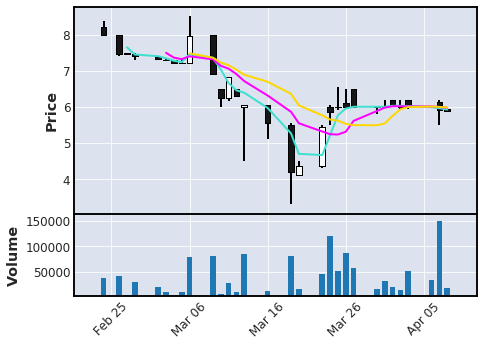

In [39]:
mpf.plot(single_company_data,type='candle',mav=(3,6,9),volume=True,show_nontrading=True)

In [37]:
single_company_data.head()

,id,avg_price,change_close,last_trade_price,sec_qid,Close,High,Low,Open,sq_previous,total_value,Volume,trading_date,company_company_id
Date,,,,,,,,,,,,,,
2020-02-24,29_2020-02-24 00:00:00.0,8.20,-0.20,8.00,SCYQT_20200200008461,8.00,8.38,8.00,8.20,8.20,313398.0,38200.0,2020-02-24 00:00:00.0,29
2020-02-26,29_2020-02-26 00:00:00.0,7.58,-0.54,7.46,SCYQT_20200200008858,7.46,8.00,7.40,8.00,8.00,320777.0,42300.0,2020-02-26 00:00:00.0,29
2020-02-27,29_2020-02-27 00:00:00.0,7.47,0.02,7.48,SCYQT_20200200008939,7.48,7.48,7.46,7.46,7.46,34371.0,4600.0,2020-02-27 00:00:00.0,29
2020-02-28,29_2020-02-28 00:00:00.0,7.41,-0.08,7.40,SCYQT_20200200009170,7.40,7.48,7.30,7.47,7.48,216328.0,29200.0,2020-02-28 00:00:00.0,29
2020-03-02,29_2020-03-02 00:00:00.0,7.37,-0.08,7.32,SCYQT_20200300009578,7.32,7.40,7.32,7.38,7.40,142910.0,19400.0,2020-03-02 00:00:00.0,29
